<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & Classification - Part 2

EDA Modelling and Conclusion

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1">Problem Statement</a></span></li><li><span><a href="#Part-2:-EDA,-Modelling-&amp;-Conclusion" data-toc-modified-id="Part-2:-EDA,-Modelling-&amp;-Conclusion-2">Part 2: EDA, Modelling &amp; Conclusion</a></span></li><li><span><a href="#NLP" data-toc-modified-id="NLP-3">NLP</a></span><ul class="toc-item"><li><span><a href="#Cleaning-Data-(removing-irrelavant-characters,-cleaning-data,-removing-stopwords)" data-toc-modified-id="Cleaning-Data-(removing-irrelavant-characters,-cleaning-data,-removing-stopwords)-3.1">Cleaning Data (removing irrelavant characters, cleaning data, removing stopwords)</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3.2">EDA</a></span><ul class="toc-item"><li><span><a href="#WordCloud" data-toc-modified-id="WordCloud-3.2.1">WordCloud</a></span></li><li><span><a href="#Average-Length-of-each-post" data-toc-modified-id="Average-Length-of-each-post-3.2.2">Average Length of each post</a></span></li><li><span><a href="#Common-words-for-each-category" data-toc-modified-id="Common-words-for-each-category-3.2.3">Common words for each category</a></span></li></ul></li></ul></li><li><span><a href="#Model-Prep" data-toc-modified-id="Model-Prep-4">Model Prep</a></span><ul class="toc-item"><li><span><a href="#Labelling" data-toc-modified-id="Labelling-4.1">Labelling</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4.2">Train Test Split</a></span></li></ul></li><li><span><a href="#Predictive-Models" data-toc-modified-id="Predictive-Models-5">Predictive Models</a></span><ul class="toc-item"><li><span><a href="#Models-with-Hyperparameter-tuning-and-Vectorizers" data-toc-modified-id="Models-with-Hyperparameter-tuning-and-Vectorizers-5.1">Models with Hyperparameter tuning and Vectorizers</a></span></li><li><span><a href="#Hyperparameters" data-toc-modified-id="Hyperparameters-5.2">Hyperparameters</a></span></li><li><span><a href="#Performance-Metrics" data-toc-modified-id="Performance-Metrics-5.3">Performance Metrics</a></span></li><li><span><a href="#User-Defined-Functions" data-toc-modified-id="User-Defined-Functions-5.4">User Defined Functions</a></span></li><li><span><a href="#Global-inputs-for-GridSearchCV" data-toc-modified-id="Global-inputs-for-GridSearchCV-5.5">Global inputs for GridSearchCV</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-6">Model Selection</a></span><ul class="toc-item"><li><span><a href="#Baseline-accuracy" data-toc-modified-id="Baseline-accuracy-6.1">Baseline accuracy</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.2">Logistic Regression</a></span></li><li><span><a href="#Multinomial-Naive-Bayes" data-toc-modified-id="Multinomial-Naive-Bayes-6.3">Multinomial Naive Bayes</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-6.4">KNN</a></span></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-6.5">Support Vector Machines</a></span></li></ul></li><li><span><a href="#Summary-of-Performance-of-Models:" data-toc-modified-id="Summary-of-Performance-of-Models:-7">Summary of Performance of Models:</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-8">Observations</a></span><ul class="toc-item"><li><span><a href="#Top-Predictors" data-toc-modified-id="Top-Predictors-8.1">Top Predictors</a></span></li><li><span><a href="#Misclassified-data" data-toc-modified-id="Misclassified-data-8.2">Misclassified data</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9">Conclusion</a></span></li></ul></div>

## Problem Statement

As a member of the Data Science Team in All Wellness online platform, we are tasked to use NLP to reduce the time and efforts required to classify members' online queries into fitness related or diet related, which will then be  channeled to the panel of certified fitness coach or nutritionist. 

---

## Part 2: EDA, Modelling & Conclusion
---

In [472]:
#import libraries

#standard imports
import pandas as pd
#so that pandas do not truncate the rows
pd.set_option('max_columns', 100) 
#Set datafrome display format
pd.options.display.float_format = "{:,.3f}".format

import numpy as np

#graph imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#define the style of sns/plt

#API imports
import requests
import time
import random

from bs4 import BeautifulSoup

#Regex
import regex as re

#Lemmatizing and Stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

#Modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#==KNN
from sklearn.neighbors import KNeighborsClassifier

#==== Classification matrix
from sklearn.metrics import f1_score, classification_report, accuracy_score, matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve, auc, roc_auc_score, RocCurveDisplay

#=== Naive Bayes
from sklearn.naive_bayes import MultinomialNB

#=== CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from collections import Counter

#=== SVC
from sklearn.svm import SVC

#word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

----

## NLP

<font color = "blue"> 

**Part 2** of the project focuses on **Natural Language Processing** and converting standard text data (like Titles and Comments) into a format that allows us to analyze it and use it in modeling. </font>

In [ ]:
df_combine = pd.read_csv('datasets/combine.csv')

### Cleaning Data (removing irrelavant characters, cleaning data, removing stopwords)

In [261]:
def cleanwords(data, do_all=True):
    """
    Function will remove all irrevant characters(or digits), HTML tags, stopwords), 
    then perform stemming to get the root word. 
    Takes in arguement:
    data- str the raw text to be converted
    
    Return the list of cleaned and stemmed words
    """    
    # 1. Remove HTML.
    review_text = BeautifulSoup(data).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4.remove stop words, including title of the subreddits
    stops = set(stopwords.words('english'))
    stops.update(['diet', 'diets', 'dieting', 'dieter', 'dieters', 'dietary', 'dieted', 'workout', 'workouts', 'working', 'working out'])
    meaningful_words = [w for w in words if w not in stops]
    
    #5 Stemming
    p_stemmer = PorterStemmer()
    meaningful_words_stemmed = [p_stemmer.stem(w) for w in meaningful_words]
    
    #6 return the list of stemmed and cleaned words
    return(meaningful_words_stemmed)

In [262]:
#clean the posts
df_combine['wordslist'] = df_combine['post'].apply(cleanwords)

In [263]:
#have a column of all the stemmed words
df_combine['stemmed_post'] = df_combine['wordslist'].str.join(" ")

<font color = "blue"> 
Separated the original post into list of actual words and stemmed words
</font>

---

### EDA
<font color = "blue"> 



- Analyse the features of the data
- Create a Wordcloud to see the frequently occuring word. This will indicate how distinct the 2 subreddits are
- Look at the average length of each post
- Look at the common words to both documents</font>

In [264]:
df_combine.groupby('subreddit')['post', 'wordslist'].describe().T

C:\Users\Rachel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


subreddit                                                      diet  \
post      count                                                 919   
          unique                                                919   
          top     Turmeric and how to use it Does putting a pinc...   
          freq                                                    1   
wordslist count                                                 919   
          unique                                                914   
          top                                                [keto]   
          freq                                                    3   

subreddit                                                   workout  
post      count                                                 914  
          unique                                                914  
          top     Dont feel the burn Ive been working out at the...  
          freq                                                    1  
wordslist count                                                 914  
          unique                                                914  
          top     [need, good, plan, boy, realli, need, good, pl...  
          freq                                                    1

#### WordCloud

In [265]:
#preparing the text for word cloud
set_diet = " ".join(r for r in df_combine[df_combine['subreddit']=='diet']['stemmed_post'])

In [266]:
#preparing the text for word cloud for wholoe of 
set_workout = " ".join(r for r in df_combine[df_combine['subreddit']=='workout']['stemmed_post'])

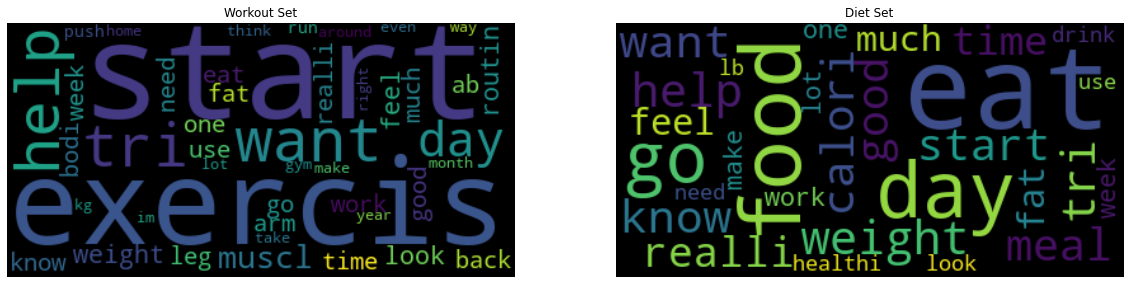

In [267]:
#plotting the word cloud
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,20)) 
listwords = [{'Workout Set': set_workout}, 
             {'Diet Set': set_diet}]
ax = ax.ravel()

for i in range(len(listwords)):
    key, val = next(iter(listwords[i].items())) 
    wordcloud = WordCloud( min_font_size=10, 
                          normalize_plurals=True,
                         repeat=False).generate(str(val))
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].axis("off")
    ax[i].set_title(str(key))
    
plt.show()

<font color = "blue"> 
The 2 sets are pretty distinct from list of words they have in each subreddit
There are some overlaps of words like 'day' and 'look' which could affect the accuracy of the prediction, but the distinct words should allow us to classify the classes with good accuracy
</font>

#### Average Length of each post

In [268]:
#find the average length of the post. 
df_combine['lenpost'] =  df_combine['stemmed_post'].apply(lambda x: len(x))

In [269]:
df_combine.groupby('subreddit')['lenpost'].agg([min, max, np.average])

,min,max,average
subreddit,,,
diet,0,2478,223.535
workout,0,8450,238.155


In [270]:
df_combine.groupby('subreddit')['lenpost'].describe().T

subreddit,diet,workout
count,919.000,914.000
mean,223.535,238.155
std,255.035,441.945
min,0.000,0.000
25%,41.500,79.000
50%,156.000,154.000
75%,300.000,278.000
max,"2,478.000","8,450.000"


<font color = "blue">There are empty records after stemming and cleaning. Investigate further </font>

In [271]:
df_combine[df_combine['lenpost']==0]

,subreddit,post,wordslist,stemmed_post,lenpost
430,workout,Workout,[],,0
1098,diet,بدائل الارز في الكيو دايت,[],,0
1165,diet,😂,[],,0


<font color = "blue"> Removing the empty posts before doing the modelling</font>

In [272]:
#drop rows for the empty rows
droprows = df_combine[df_combine['lenpost']==0].index

In [273]:
df_combine = df_combine.drop(droprows, axis=0)

In [274]:
df_combine.groupby('subreddit')['lenpost'].agg([ min, max, np.average])

,min,max,average
subreddit,,,
diet,3,2478,224.023
workout,3,8450,238.416


<font color = "blue"> Each subreddit had average of 225 to 241 words in each posts. Data seemed balance from both categoies </font>

array([<AxesSubplot:title={'center':'diet'}>,
       <AxesSubplot:title={'center':'workout'}>], dtype=object)

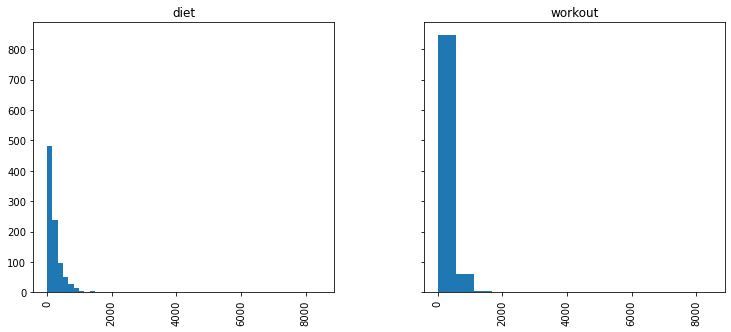

In [275]:
#checking the average length of each post
df_combine.hist(column='lenpost', by='subreddit', bins=15, figsize=(12,5), sharex=True,
    sharey = True)

<font color = "blue"> Diet group generally have a bigger variance in the length of posts  </font>

#### Common words for each category

In [368]:
def findcommonwords(data, isstr=True, num_words=20, plot=True, color=None):
    """
    Function to count the top number of wrords and display in a graph
    Takes in arguements:
    - data - list or string to count words
    - isstr - if True, data parsed in is a string, and needs to perform split into list 
    - num_words - count of the most common words
    - plot - if a graph is required to be plotted. 
    
    Returns Dataframe of the common words and their count
    """
    if isstr:
        #splitting into individual words
        indiv_words = data.split(" ")
    else:
        indiv_words = data
        
    common = pd.DataFrame(Counter(indiv_words).most_common(num_words), columns=('words', 'count')).sort_values(by='count', ascending=False)
    
    if plot:
        
        sns.barplot(x='count', y='words', data=common, color=color)
        
    return common

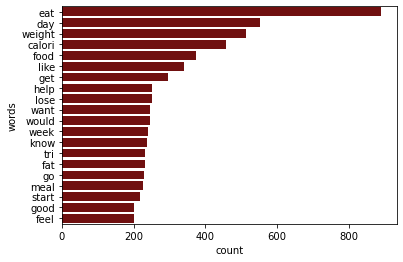

In [369]:
#plot out the top 20 common words for workout document
common_diet = findcommonwords(set_diet, isstr=True, num_words=20, plot=True, color='maroon')

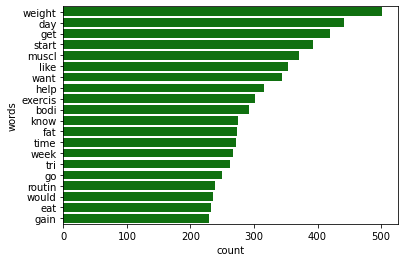

In [370]:
#plot out the top 20 common words for workout document
common_workout = findcommonwords(set_workout, isstr=True, num_words=20, plot=True, color='green')

In [279]:
#comparing the 2 dataframes on the 20 top common words:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    comparison_df = df1.merge(df2, on='words',
                              indicator=True,
                              how='outer')
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
    return diff_df

In [280]:
dataframe_difference(common_diet, common_workout, which='both')

,words,count_x,count_y,_merge
0,eat,890.000,232.000,both
1,day,552.000,442.000,both
2,weight,515.000,502.000,both
5,like,341.000,353.000,both
6,get,295.000,420.000,both
7,help,252.000,316.000,both
9,want,245.000,344.000,both
10,would,245.000,236.000,both
11,week,241.000,267.000,both
12,know,238.000,275.000,both


<font color = "blue"> 
Existence of these words in both classes may cause error. I will remove them from the stop words as well</font>

In [281]:
common_words =  dataframe_difference(common_diet, common_workout, which='both')['words'].tolist()

In [282]:
common_words

['eat',
 'day',
 'weight',
 'like',
 'get',
 'help',
 'want',
 'would',
 'week',
 'know',
 'tri',
 'fat',
 'go',
 'start']

## Model Prep


### Labelling
 
Convert workout/diet sets into binary labels:
- 0 for workout
- 1 for diet


In [283]:
df_combine['is_diet'] = df_combine['subreddit'].map({'workout': 0, 'diet': 1})
df_combine.tail()

,subreddit,post,wordslist,stemmed_post,lenpost,is_diet
1828,diet,"Am I Actually ""Intermittent Fasting""? I have b...","[actual, intermitt, fast, lot, success, keto, ...",actual intermitt fast lot success keto plateau...,502,1
1829,diet,50 calories over calorie allowance I went over...,"[calori, calori, allow, went, calori, allow, c...",calori calori allow went calori allow calori e...,88,1
1830,diet,BEST WHEY PROTEIN FOR WEIGHT LOSS (lean) Which...,"[best, whey, protein, weight, loss, lean, prot...",best whey protein weight loss lean protein bes...,121,1
1831,diet,Keep getting cravings/hungry in the evening He...,"[keep, get, crave, hungri, even, hey, new, cut...",keep get crave hungri even hey new cut calori ...,311,1
1832,diet,Why is my diet so expensive to maintain? So I ...,"[expens, maintain, got, back, shop, spent, alm...",expens maintain got back shop spent almost alm...,694,1


In [284]:
df_combine['is_diet'].value_counts()

1    917
0    913
Name: is_diet, dtype: int64

### Train Test Split

In [286]:
X = df_combine['stemmed_post']
y = df_combine['is_diet']

In [287]:
#Train test split with stratify
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42, stratify=y, test_size=0.33)

In [288]:
X_train.shape

(1226,)

In [289]:
X_val.shape

(604,)

## Predictive Models
**Part 3** of the project focuses on **Classification Modeling.** 

### Models with Hyperparameter tuning and Vectorizers

We will use both ```CountVectorizer()``` and ```TfidfVectorizer()``` to transform the data before fitting into the following models:

1. Logistic Regression 
2. Naive Bayes 
3. KNearestNeighbours with (KNN) 
4. Support Vector Machines (SVM) 

The models will be run with **hyperparameters tuning** for the various model using GridSearch on 5-folds Cross Validation

### Hyperparameters

**CountVectorizer Parameters:**
- max_features': [1000, 3000, 5000]
- max_df': [1, 3, 5, 7]

**TF-IDF Parameters:**
- max_features': [1000, 3000, 5000]
- max_df': [0.3, 0.4, 0.5, 0.7]
- ngram_range':[(1,2), (2,2)]

**Linear Regression:**
- solver': ['newton-cg', 'lbfgs', 'liblinear']
- C':[100,10,1.0, 0.1, 0.01]
- penalty':['l1', 'l2']

**KNeighbours:**
- n_neighbors': [3,5,7,9, 11, 13]

**Support Vector Machine:** 
- svm__C': [1.0, 2.0, 3.0],
- svm__kernel': ['rbf', 'linear', 'poly'],
- svm__degree': [3,4,5]

### Performance Metrics

The models will be gauged on the performance using the following metrics:

**1) Accuracy - TP+TN/total records**
   - How accurate is the Model in predicting both classes? 
   - The higher score the more accurate the model is at predicting the classes
    
**2) Matthews Correlation Coefficient (MCC)** 
   - What is the correlation coefficient between the observed and predicted binary classifications --  
   - the  higher the score indicates that the model was able to correctly predict the majority of positive data instances and the majority of negative data instances
   
Not considering other metrics like Recall or Specificity because the 2 classes are equally important, and not just looking at the positive class, and in this case, accuracy and MCC will be a better gauge on model performanace.


### User Defined Functions

In [465]:
def classifiermodel(X_train, y_train, X_test, y_test, model, gs=False, title=None):
    
    """"
    Function to fit and display scores of the model, the confusion matrix and AUC ROC
    
    Take in Arguements:
     - X_train, y_train, X_test, y_test - the train test split data
     - model - the type of model to fit data
     - gs - if the model parsed in is a grid search
     - est_trans - the type of estimator and transformer being used
     - labels - list that model is classification
     
     Returns the dataframe of the predicted values and actual values
    """    
    model.fit(X_train, y_train)
    trgscore = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    valscore = model.score(X_test, y_test)
    
    #getting the probabilities of test data
    
    if gs:
        best_model = model.best_estimator_
        best_score = model.best_score_
        best_params =  model.best_params_
    else:
        best_model = model
        best_score = trgscore
        best_params = model.get_params()
        
    proba = model.predict_proba(X_test)
    proba = proba[:, 1]

    print(f'======== {title} =================\n')
    
    
    print('Best parameters  : ', best_params)
    print('Best CV  score   : ', best_score)
    print('Training score   :', trgscore)
    print('Validation score :', valscore)
    print()    
        
    return y_pred, proba

In [494]:
def model_metrics(true, pred, prob, cm=False, show_df=False, title = 'Model_Metrics', labels=['0', '1']):
    """
    Function that calculates and returns a dataframe with classification metrics.
    Input
    true: true values of target variable
    pred: predicted values of target variable
    prob: probability of positive class 
    cm: confusion matrix will be plot if == True
    show_df: dataframe with metrics will be displayed if == True
    title: the column name for the dataframe that is displayed/returned
    labels: the negative and positive class labels 
    
    Output
    df: dataframe with classification metrics
    
    Metric Descriptions
    True Positive: total number of positive class correctly predicted
    True Negative: total number of negative class correctly predicted
    False Positives (Type I Error): total number of negatives class predicted as positive
    False Negative (Type II Error): total number of positives class predicted as negative
    
    Accuracy: Percentage of observations correctly classified.
    Misclassification Rate: Percentage of observations incorrectly classified.
    Sensitivity(Recall): Percentage of observations with positive correctly classified.
    Specificity: Percentage of observations with negative correctly classified.
    Precision: Percentage of positive class prediction vs total positive predictions
    F1 Score: Weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0
    AUC ROC: AUC ROC Score
    """
    tn, fp, fn, tp = confusion_matrix(true, pred).ravel()
    fpr, tpr, threhold = roc_curve(true, prob)
    
    if cm:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        ax = ax.ravel()
 
        #plot confusion matrix
        ax[0].set_title('Confusion Matrix')
        sns.heatmap([[tn,fp],[fn,tp]], 
                         annot=True, 
                         cmap="YlGnBu", 
                         cbar_kws={'label': 'Scale'}, 
                         fmt='g', ax=ax[0])
        ax[0].set_xticklabels(labels)
        ax[0].set_yticklabels(labels)
        ax[0].set(ylabel="True Label", xlabel="Predicted Label")
        
        #plot roc_curve
        ax[1].set_title('ROC Curve')
        ax[1].plot(fpr, tpr, lw = 2, label='ROC curve (area = %0.2f)' % roc_auc_score(true,prob))
        ax[1].plot([0, 1], [0,1], lw = 2, linestyle = '--')
        ax[1].set(ylabel="True Positive Rate", xlabel="False Positive Rate")
        ax[1].legend(loc='lower right')
        
        
    df = pd.DataFrame(data = [(tp+tn)/(tp+fp+tn+fn),
                              1- ((tp+tn)/(tp+fp+tn+fn)),
                              tp/(tp+fn),
                              tn/(tn+fp),
                              tp/(tp+fp),
                              tp,
                              fp,
                              fn,
                              tn,
                              f1_score(true, pred),
                              roc_auc_score(true,prob),
                              matthews_corrcoef(true, pred)],
                         index = ['Accuracy',
                                  'Misclassification Rate',
                                  'Sensitivity (Recall)',
                                  'Specificity',
                                  'Precision', 
                                  'True Positive',
                                  'False Positive',
                                  'False Negative',
                                  'True Negative', 
                                  'F1-Score',
                                  'AUC Score',
                                  'Matthews Correlation'],
                        columns = [title])
    if show_df:
        display(df)
    return(df)

In [467]:
def plot_impt_features(features_df, title, top_feat=20):
    plt.figure(figsize=(12,6))
    sns.barplot(x = features_df['feature_importance'][:top_feat], y = features_df['feature'][:top_feat], color='b')
    plt.title(title, fontsize=18)
    plt.xlabel('Feature importance', fontsize=14)
    plt.xticks(size=13)
    plt.ylabel(None)
    plt.yticks(size=13);

### Global inputs for GridSearchCV

In [478]:
cv = 5
n_jobs = -1
labels = ['workout', 'diet']

## Model Selection

### Baseline accuracy

In [290]:
y_val.value_counts(normalize=True)

1   0.502
0   0.498
Name: is_diet, dtype: float64

<font color = "blue"> Baseline model: 0.50 of the majority class (diet class)</font>

### Logistic Regression

In [469]:
#Tuning Hyperparameters to find the best params using GridSearch
cveclr_pipe = Pipeline([('cvec', CountVectorizer(stop_words=common_words)), ('lr', LogisticRegression())])
cveclr_param_grid = {'cvec__max_features': [1000, 3000, 5000],
                     'cvec__max_df': [1, 3, 5, 7],
                     'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                     'lr__C':[100,10,1.0, 0.1, 0.01],
                     'lr__penalty':['l1', 'l2']}
    
cveclr_gs = GridSearchCV(cveclr_pipe, param_grid=cveclr_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

cveclr_pred, cveclr_proba = classifiermodel(X_train, y_train, X_val, y_val, 
                            model=cveclr_gs, gs=True, 
                            title='LogisticRegression + CountVectorizer with Hyperparameters Tuning')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   53.8s finished


======== LogisticRegression + CountVectorizer with Hyperparameters Tuning =================

Best parameters  :  {'cvec__max_df': 7, 'cvec__max_features': 5000, 'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best CV  score   :  0.694119794259167
Training score   : 0.8499184339314845
Validation score : 0.6937086092715232



In [496]:
cveclr_m = model_metrics(y_val, cveclr_pred, cveclr_proba, title='CountVec + LogReg', labels=labels)
cveclr_m

,CountVec + LogReg
Accuracy,0.694
Misclassification Rate,0.306
Sensitivity (Recall),0.779
Specificity,0.608
Precision,0.667
True Positive,236.000
False Positive,118.000
False Negative,67.000
True Negative,183.000
F1-Score,0.718


In [480]:
#Tuning Hyperparameters to find the best params using GridSearch
tveclr_pipe = Pipeline([('tvec', TfidfVectorizer(stop_words=common_words)), ('lr', LogisticRegression())])

tveclr_param_grid = {'tvec__ngram_range':[(1,2), (2,2)],
                     'tvec__max_features': [1000, 3000, 5000],
                     'tvec__max_df': [0.3, 0.4, 0.5, 0.7],
                     'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                     'lr__C':[100,10,1.0, 0.1, 0.01],
                     'lr__penalty':['l1', 'l2']}
    
tveclr_gs = GridSearchCV(tveclr_pipe, param_grid=tveclr_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)


tveclr_pred, tveclr_proba = classifiermodel(X_train, y_train, X_val, y_val, 
                            model=tveclr_gs, gs=True, 
                            title='LogisticRegression +  TF-IDF with Hyperparameters Tuning')

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  3.9min finished


======== LogisticRegression +  TF-IDF with Hyperparameters Tuning =================

Best parameters  :  {'lr__C': 1.0, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'tvec__max_df': 0.3, 'tvec__max_features': 3000, 'tvec__ngram_range': (1, 2)}
Best CV  score   :  0.8825286212045794
Training score   : 0.9543230016313213
Validation score : 0.8509933774834437



,TFIDF + LogReg
Accuracy,0.851
Misclassification Rate,0.149
Sensitivity (Recall),0.825
Specificity,0.877
Precision,0.871
True Positive,250.000
False Positive,37.000
False Negative,53.000
True Negative,264.000
F1-Score,0.847


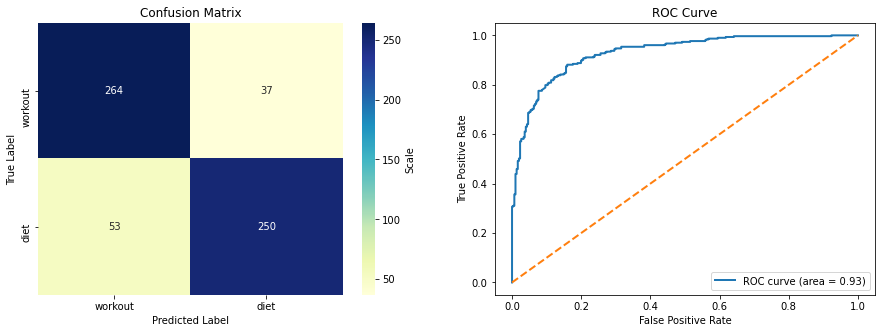

In [497]:
tveclr_m = model_metrics(y_val, tveclr_pred, tveclr_proba, cm=True, title='TFIDF + LogReg', labels=labels)
tveclr_m

### Multinomial Naive Bayes

In [482]:
#Naive Bayes, using Multinomial with CountVectorizer and hyper parameters tuning
cvecnb_pipe = Pipeline([('cvec', CountVectorizer(stop_words=common_words)), ('nb' , MultinomialNB())])
cvecnb_param_grid = {'cvec__max_features': [1000, 3000, 5000],
                     'cvec__max_df': [1, 3, 5, 7]}
    
cvecnb_gs = GridSearchCV(cvecnb_pipe, param_grid=cvecnb_param_grid, cv=cv, n_jobs=n_jobs,  verbose=1)

cvecnb_pred, cvecnb_proba = classifiermodel(X_train, y_train, X_val, y_val, 
                            model=cvecnb_gs, gs=True, 
                            title='Naive Bayes + CountVectorizer with Hyper parameters')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


======== Naive Bayes + CountVectorizer with Hyper parameters =================

Best parameters  :  {'cvec__max_df': 7, 'cvec__max_features': 5000}
Best CV  score   :  0.7063680106188818
Training score   : 0.863784665579119
Validation score : 0.6903973509933775



[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished


,CountVec + NaiveBayes
Accuracy,0.690
Misclassification Rate,0.310
Sensitivity (Recall),0.752
Specificity,0.628
Precision,0.671
True Positive,228.000
False Positive,112.000
False Negative,75.000
True Negative,189.000
F1-Score,0.709


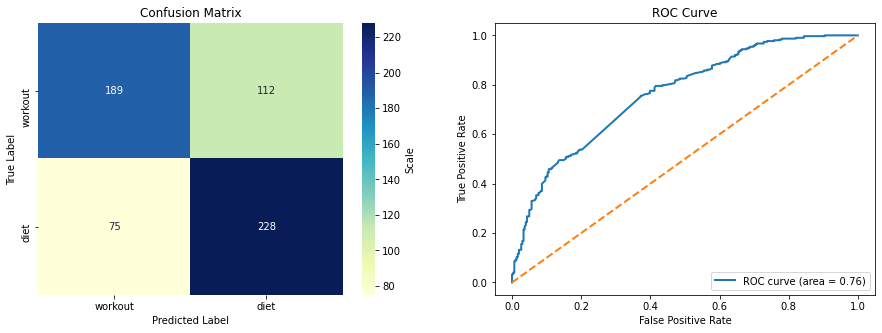

In [498]:
cvecnb_m = model_metrics(y_val, cvecnb_pred, cvecnb_proba, cm=True, title='CountVec + NaiveBayes', labels=labels)
cvecnb_m

In [500]:
#NB with TF-IDF with hyper parameters
tvecnb_pipe = Pipeline([('tvec', TfidfVectorizer(stop_words=common_words)), ('nb' , MultinomialNB())])

tvecnb_param_grid = {'tvec__ngram_range':[(1,2), (2,2)],
                     'tvec__max_features': [1000, 3000, 5000],
                     'tvec__max_df': [0.3, 0.4, 0.5, 0.7]}
    
tvecnb_gs = GridSearchCV(tvecnb_pipe, param_grid=tvecnb_param_grid, n_jobs=-1, verbose=1)

tvecnb_pred, tvecnb_proba  = classifiermodel(X_train, y_train, X_val, y_val, 
                            model=tvecnb_gs, gs=True, 
                            title='Naive Bayes+  TF-IDF with Hyperparameters Tuning')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.2s finished


======== Naive Bayes+  TF-IDF with Hyperparameters Tuning =================

Best parameters  :  {'tvec__max_df': 0.3, 'tvec__max_features': 3000, 'tvec__ngram_range': (1, 2)}
Best CV  score   :  0.8849776007964161
Training score   : 0.9518760195758564
Validation score : 0.8443708609271523



,TFIDF + NaiveBayes
Accuracy,0.844
Misclassification Rate,0.156
Sensitivity (Recall),0.802
Specificity,0.887
Precision,0.877
True Positive,243.000
False Positive,34.000
False Negative,60.000
True Negative,267.000
F1-Score,0.838


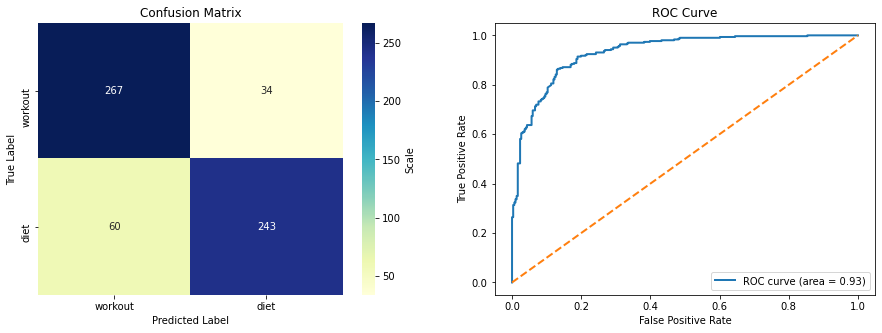

In [501]:
tvecnb_m = model_metrics(y_val, tvecnb_pred, tvecnb_proba, cm=True, title='TFIDF + NaiveBayes', labels=labels)
tvecnb_m

### KNN

In [502]:
#KNN with CountVectorizer and default parameters
cvecknn_pipe = Pipeline([('cvec', CountVectorizer(stop_words=common_words)), ('knn' , KNeighborsClassifier())])
cvecknn_param_grid = {'cvec__max_features': [1000, 3000, 5000],
                     'cvec__max_df': [1, 3, 5, 7],
                     'knn__n_neighbors': [3,5,7,9, 11, 13]
                     }
    
cvecknn_gs = GridSearchCV(cvecknn_pipe, param_grid=cvecknn_param_grid, n_jobs=-1, verbose=1)

cvecknn_pred, cvecknn_proba = classifiermodel(X_train, y_train, X_val, y_val, 
                            model=cvecknn_gs, gs=True, 
                            title='KNeighborsClassifier + CountVectorizer with Hyper parameters')

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.9s finished


======== KNeighborsClassifier + CountVectorizer with Hyper parameters =================

Best parameters  :  {'cvec__max_df': 7, 'cvec__max_features': 1000, 'knn__n_neighbors': 7}
Best CV  score   :  0.5587323709971794
Training score   : 0.6566068515497553
Validation score : 0.5794701986754967



,CountVec + KNN
Accuracy,0.579
Misclassification Rate,0.421
Sensitivity (Recall),0.785
Specificity,0.372
Precision,0.557
True Positive,238.000
False Positive,189.000
False Negative,65.000
True Negative,112.000
F1-Score,0.652


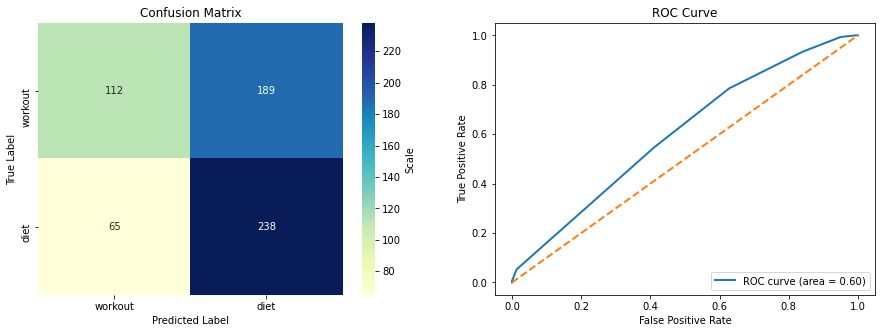

In [507]:
cvecknn_m = model_metrics(y_val, cvecknn_pred, cvecknn_proba, cm=True, title='CountVec + KNN', labels=labels)
cvecknn_m

In [504]:
#KNN with TF-IDF with hyper parameters
tvecknn_pipe = Pipeline([('tvec', TfidfVectorizer(stop_words=common_words)), ('knn' , KNeighborsClassifier())])
tvecknn_param_grid = {'tvec__ngram_range':[(1,2), (2,2)],
                     'tvec__max_features': [1000, 3000, 5000],
                     'tvec__max_df': [0.3, 0.4, 0.5, 0.7],
                     'knn__n_neighbors': [3,5,7,9, 11, 13]}

tvecknn_gs = GridSearchCV(tvecknn_pipe, param_grid=tvecknn_param_grid, n_jobs=-1, verbose=1)

tvecknn_pred, tvecknn_proba  = classifiermodel(X_train, y_train, X_val, y_val, 
                            model=tvecknn_gs, gs=True, 
                            title='KNeighborsClassifier + TF-IDF with Hyper parameters')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   46.3s finished


======== KNeighborsClassifier + TF-IDF with Hyper parameters =================

Best parameters  :  {'knn__n_neighbors': 13, 'tvec__max_df': 0.3, 'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2)}
Best CV  score   :  0.8132171893147502
Training score   : 0.8433931484502447
Validation score : 0.7996688741721855



,TFIDF + KNN
Accuracy,0.800
Misclassification Rate,0.200
Sensitivity (Recall),0.917
Specificity,0.681
Precision,0.743
True Positive,278.000
False Positive,96.000
False Negative,25.000
True Negative,205.000
F1-Score,0.821


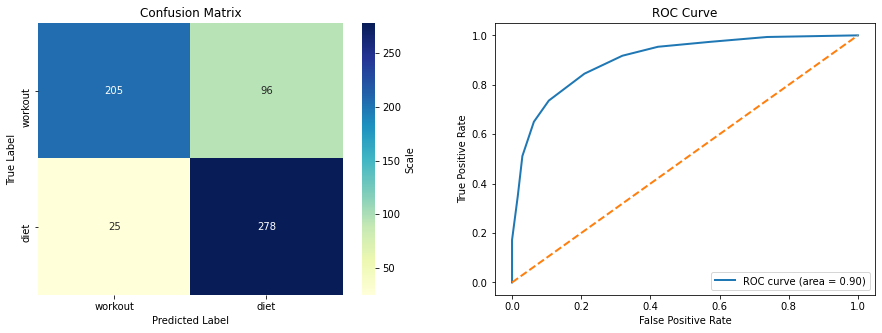

In [508]:
tvecknn_m = model_metrics(y_val, tvecknn_pred, tvecknn_proba, cm=True, title='TFIDF + KNN', labels=labels)
tvecknn_m

### Support Vector Machines

In [505]:
#Svm with CountVectorizer and hyper parameters
cvecsvm_pipe = Pipeline([('cvec', CountVectorizer(stop_words=common_words)), ('svm' , SVC(probability=True))])
cvecsvm_param_grid = {'cvec__max_features': [1000, 3000, 5000],
                      'cvec__max_df': [1, 3, 5, 7],
                      'svm__C': [1.0, 2.0, 3.0],
                      'svm__kernel': ['rbf', 'linear', 'poly'],
                      'svm__degree': [3,4,5]}
    
cvecsvm_gs = GridSearchCV(cvecsvm_pipe, param_grid=cvecsvm_param_grid, n_jobs=-1, verbose=1)

cvecsvm_pred, cvecsvm_proba = classifiermodel(X_train, y_train, X_val, y_val, 
                            model=cvecsvm_gs, gs=True, 
                            title='SVC + CountVectorizer with Hyper parameters')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.5min finished


======== SVC + CountVectorizer with Hyper parameters =================

Best parameters  :  {'cvec__max_df': 7, 'cvec__max_features': 5000, 'svm__C': 3.0, 'svm__degree': 3, 'svm__kernel': 'rbf'}
Best CV  score   :  0.6745345943255351
Training score   : 0.9061990212071778
Validation score : 0.6539735099337748



,CountVec + SVC
Accuracy,0.654
Misclassification Rate,0.346
Sensitivity (Recall),0.548
Specificity,0.761
Precision,0.697
True Positive,166.000
False Positive,72.000
False Negative,137.000
True Negative,229.000
F1-Score,0.614


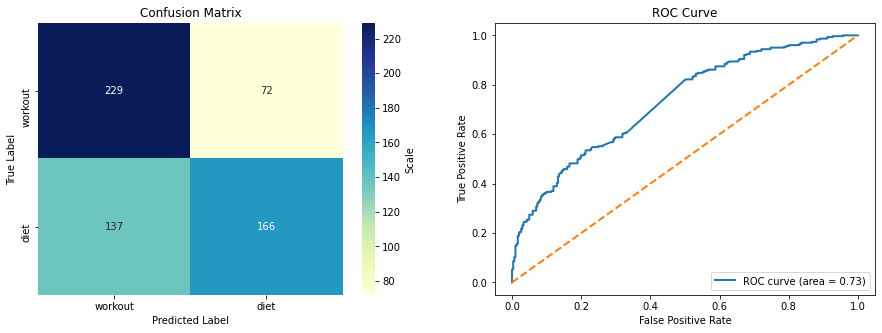

In [509]:
cvecsvm_m = model_metrics(y_val, cvecsvm_pred, cvecsvm_proba, cm=True, title='CountVec + SVC', labels=labels)
cvecsvm_m

In [506]:
#SVM with TF-IDF with Hyper Parameters
tvecsvm_pipe = Pipeline([('tvec', TfidfVectorizer(stop_words=common_words)), ('svm' , SVC(probability=True))])

tvecsvm_param_grid = {'tvec__ngram_range':[(1,2), (2,2)],
                      'tvec__max_features': [1000, 3000, 5000],
                      'tvec__max_df': [0.3, 0.4, 0.5, 0.7],
                      'svm__C': [1.0, 2.0, 3.0],
                      'svm__kernel': ['rbf', 'linear', 'poly'],
                      'svm__degree': [3,4,5]}

tvecsvm_gs = GridSearchCV(tvecsvm_pipe, param_grid=tvecsvm_param_grid, n_jobs=-1, verbose=1)

tvecsvm_pred, tvecsvm_proba  = classifiermodel(X_train, y_train, X_val, y_val, 
                            model=tvecsvm_gs, gs=True, 
                            title='SVC + TF-IDF with Hyper parameters')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 15.2min finished


======== SVC + TF-IDF with Hyper parameters =================

Best parameters  :  {'svm__C': 3.0, 'svm__degree': 3, 'svm__kernel': 'rbf', 'tvec__max_df': 0.3, 'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2)}
Best CV  score   :  0.8768176538908247
Training score   : 0.99836867862969
Validation score : 0.8443708609271523



,TFIDF + SVC
Accuracy,0.844
Misclassification Rate,0.156
Sensitivity (Recall),0.805
Specificity,0.884
Precision,0.875
True Positive,244.000
False Positive,35.000
False Negative,59.000
True Negative,266.000
F1-Score,0.838


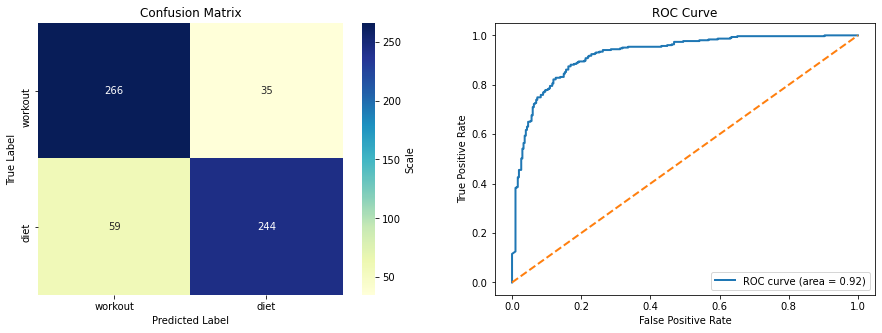

In [512]:
tvecsvm_m = model_metrics(y_val, tvecsvm_pred, tvecsvm_proba, cm=True, title='TFIDF + SVC', labels=labels)
tvecsvm_m

## Summary of Performance of Models:

In [511]:
lst_metrics = [cveclr_m, tveclr_m, cvecnb_m, tvecnb_m, cvecknn_m, tvecknn_m, cvecsvm_m, tvecsvm_m]
combine_metrics = pd.concat((items for items in lst_metrics), axis=1, join='inner')
combine_metrics.reset_index().rename(columns={combine_metrics.index.name:'metrics'})  

combine_metrics

,CountVec + LogReg,TFIDF + LogReg,CountVec + NaiveBayes,TFIDF + NaiveBayes,CountVec + KNN,TFIDF + KNN,CountVec + SVC,CountVec + SVC
Accuracy,0.694,0.851,0.690,0.844,0.579,0.800,0.654,0.844
Misclassification Rate,0.306,0.149,0.310,0.156,0.421,0.200,0.346,0.156
Sensitivity (Recall),0.779,0.825,0.752,0.802,0.785,0.917,0.548,0.805
Specificity,0.608,0.877,0.628,0.887,0.372,0.681,0.761,0.884
Precision,0.667,0.871,0.671,0.877,0.557,0.743,0.697,0.875
True Positive,236.000,250.000,228.000,243.000,238.000,278.000,166.000,244.000
False Positive,118.000,37.000,112.000,34.000,189.000,96.000,72.000,35.000
False Negative,67.000,53.000,75.000,60.000,65.000,25.000,137.000,59.000
True Negative,183.000,264.000,189.000,267.000,112.000,205.000,229.000,266.000
F1-Score,0.718,0.847,0.709,0.838,0.652,0.821,0.614,0.838


|Model|Best Score|Acurracy on Training Data|Accuracy on Validation|MCC|Best Param|
|:------|:-----|:-----|:-------|:-------|:---|
|Logistic Regression w CountVectorizer|0.694|0.850|0.694|0.393|'cvec__max_df': 7, 'cvec__max_features': 5000, 'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'|
|Logistic Regression w TF-IDF|0.883|0.954|0.851|0.703|'lr__C': 1.0, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'tvec__max_df': 0.3, 'tvec__max_features': 3000, 'tvec__ngram_range': (1, 2)| 
|Naive Bayes w CountVectorizer|0.706|0.864|0.690|0.383|'cvec__max_df': 7, 'cvec__max_features': 5000|
|Naive Bayes w TF-IDF|0.885|0.952|0.844|0.691|'tvec__max_df': 0.3, 'tvec__max_features': 3000, 'tvec__ngram_range': (1, 2)|
|KNN w CountVectorizer|0.559|0.657|0.579|0.196|'cvec__max_df': 7, 'cvec__max_features': 1000, 'knn__n_neighbors': 7|
|KNN w TF-IDF|0.813|0.843|0.800|0.616|'knn__n_neighbors': 13, 'tvec__max_df': 0.3, 'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2)|
|SVM w CountVectorizer|0.675|0.906|0.654|0.316|'cvec__max_df': 7, 'cvec__max_features': 5000, 'svm__C': 3.0, 'svm__degree': 3, 'svm__kernel': 'rbf'|
|SVM w TF-IDF|0.877|0.998|0.844|0.691|'svm__C': 3.0, 'svm__degree': 3, 'svm__kernel': 'rbf', 'tvec__max_df': 0.3, 'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2)|

## Observations

<font color = "blue"> 
The model that performs best here is the **Logistic Regression w TF-IDF** with the following parameters
    
- 'lr__C': 1.0, 
- 'lr__penalty': 'l2', 
- 'lr__solver': 'liblinear'
- 'tvec__max_df': 0.3
- 'tvec__max_features': 3000, 
- 'tvec__ngram_range': (1, 2)
        
which gives us:
- **0.851** accuracy score on Validation data 
- **0.703** on MCC score onn Validation data
</font>	

In [341]:
#running the model with the best parameters and find the coefficients 
tvec = TfidfVectorizer(stop_words=common_words, max_df=0.3, max_features=3000,ngram_range=(1, 2))

# Fit TF-IDF on the training data and transform training data.
X_train_tvec = tvec.fit_transform(X_train)
# Transform our testing data with the already-fit TFIDF
X_val_tvec = tvec.transform(X_val)

final = LogisticRegression(C=1, solver='liblinear', penalty='l2')

final.fit(X_train_tvec, y_train)
predictions = final.predict(X_val_tvec)

### Top Predictors

In [343]:
def plot_coefficients(model, feature_names, top_features=20):
    """
    Function to plot the top coefficient for the linear model
    
    Takes in arguements:
    - model - the linear model which has the coef_ arguement
    - feature_names - features that goes into the model
    - top_features - number of features that has the most influence of the outcome
    """
    
    coef = model.coef_.ravel()

    top_positive_coefficients = np.argsort(coef)[-top_features:]
    
    top_negative_coefficients = np.argsort(coef)[:top_features]
    
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

    # create plot
    plt.figure(figsize=(15, 7))
    colors = ['green' if c < 0 else 'maroon' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
    plt.show()

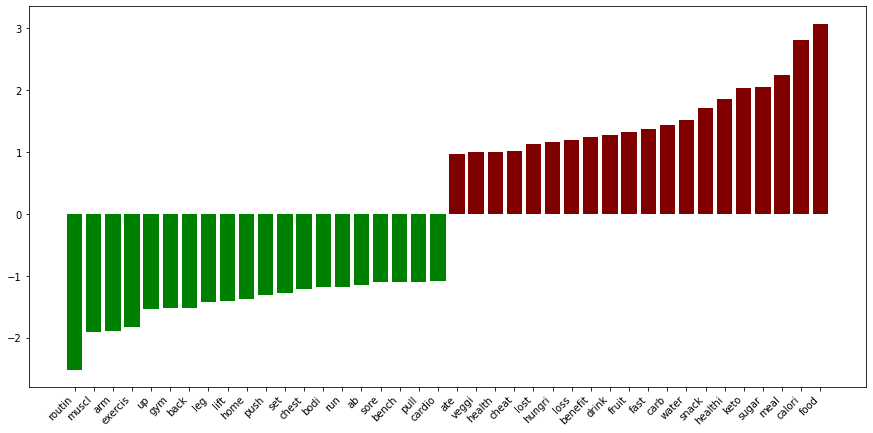

In [344]:
plot_coefficients(model=final, feature_names=tvec.get_feature_names(), top_features=20)

<font color = "blue"> 
Top Predictors:
- workout: **routin(e),muscle, arm, exercis(e), up** 
- diet   : **food, calori(e), meal, sugar, keto** 
</font>

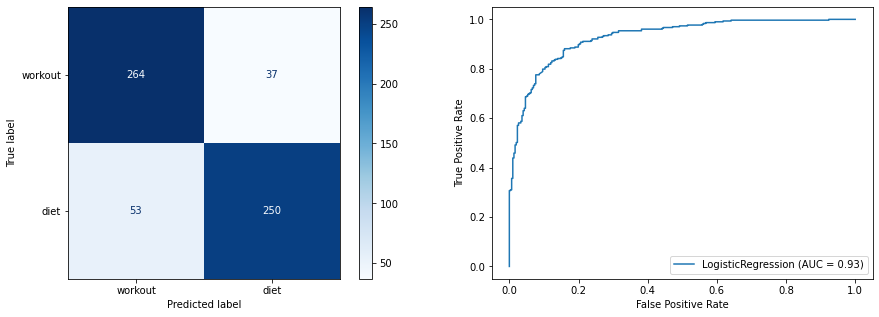

In [464]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5)) 
ax = ax.ravel()
plot_confusion_matrix(final, X_val_tvec, y_val, display_labels=labels, cmap='Blues', values_format='d', ax=ax[0])
plot_roc_curve(final, X_val_tvec, y_val, ax=ax[1])

<font color = "blue"> 
Now to look at the 53 misclassified diet class and the 37 misclassified workout class
</font>    

### Misclassified data

In [322]:
results = y_val.to_frame()
results.rename(columns={'is_diet':'actual'}, inplace=True)
results['predicted'] = predictions

wrongresults = results[results['predicted']!=results['actual']].index

In [323]:
wrongresults_df = df_combine.loc[wrongresults][['subreddit', 'wordslist', 'stemmed_post']].sort_values(by='subreddit')

In [405]:
wrongresults_df['predicted'] = results.loc[wrongresults][['predicted']]
wrongresults_df.tail(20)

,subreddit,wordslist,stemmed_post,predicted
207,workout,"[protein, calori, day, mayb, day, week, questi...",protein calori day mayb day week question day ...,1
749,workout,"[good, preworkout, good, preworkout, trustwort...",good preworkout good preworkout trustworthi on...,1
819,workout,"[fast, run, fast, plan, remaind, year, lift, c...",fast run fast plan remaind year lift cardio pe...,1
611,workout,"[benefit, bcaa, read, watch, non, bias, review...",benefit bcaa read watch non bias review bcaa l...,1
490,workout,"[love, proudct, help, whole, bodi, overweight,...",love proudct help whole bodi overweight found wow,1
696,workout,"[food, plan, muscl, build, hey, recent, chang,...",food plan muscl build hey recent chang food pl...,1
224,workout,"[weight, loss, work, may, sound, stupid, burn,...",weight loss work may sound stupid burn cal nee...,1
521,workout,"[male, good, idea, start, weightlift]",male good idea start weightlift,1
894,workout,"[n, perca, isso, alimento, que, te, ajudam, em...",n perca isso alimento que te ajudam emagrec,1
575,workout,"[look, advic, lose, weight, hey, guy, hope, so...",look advic lose weight hey guy hope someon hel...,1


In [325]:
wrongresults_df['subreddit'].value_counts()

diet       54
workout    34
Name: subreddit, dtype: int64

In [371]:
def exclude_words(data, ex_words):
    """
    Function to check if item in parsed in data is in list of words to exclude
    Takes in arguements:
    - data - list of words to check
    - excludewords - list of words to check against to exclude
    
    returns string that does not include the excludewords
    """
    checked_words = [w for w in data.split() if w not in ex_words]
    return checked_words

In [366]:
wrong_diet = ' '.join(wrongresults_df[wrongresults_df['subreddit']=='diet']['stemmed_post'].values)

In [372]:
wrong_workout = ' '.join(wrongresults_df[wrongresults_df['subreddit']=='workout']['stemmed_post'].values)

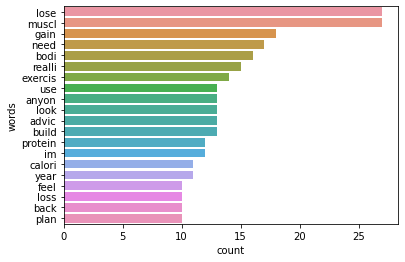

In [379]:
wrong_diet_df= findcommonwords(exclude_words(wrong_diet, common_words), isstr=False, num_words=20, plot=True, color=None)

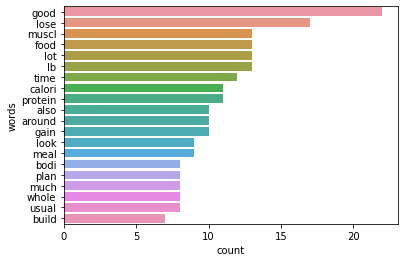

In [380]:
wrong_workout_df = findcommonwords(exclude_words(wrong_workout, common_words), isstr=False, num_words=20, plot=True, color=None)

<font color = "blue"> 
Some of the top misclassified data has words that are promminent in the other category. Examine 2 of each misclassified record to investigate
</font>   

In [403]:
#post diet wrongly classified as workout 
df_combine.loc[1741][['post']].values

array(['Any tips for what would be the best diet for my ideal body type? What should I cut out? I’m naturally a big boi but I’m pretty thin now for the most part. I’m 5’11, 164 lbs. I have a decent amount of fat on my lower back and my thighs that I’ve never in my life been able to get rid of. I have very little definition and I’ve never had a hint of abs. Most of all I wanna lose that fat and get ab definition. Then I wanna bulk up a little. I’m less worried about staying bulked up then I am about keeping that pesky fat off.\n\nI’ve been doing a 15 hour fast between 8pm and 12pm every day and it’s helped me sleep and my skin has been way less flabby (except for the past couple days but I’ve been eating junk food). I mostly avoid fast food and I eat once or twice a day with “healthy” snacks in between. For the past month I’ve been eating chicken breast and eggs every day. I eat fruit and sometimes veggies every day. I honestly don’t know a lot about calories and nutrition.\n\nI’m a run

<font color = "blue"> 
Includes words like runner, workouts, Mixed description with dieting queries
</font>   

In [404]:
#post diet wrongly classified as workout 
df_combine.loc[1337][['post']].values

array(["Can't figure out the right way for me to eat I’m 17, 5’3 and 115lbs. But I’m “skinny fat”, so I’m trying to lose the fat and build a little bit of muscle. I’m vegan, and starting a couple days ago, I’m trying to consume 50g+ of protein. I don’t like eating to be honest, but I’m doing my best so that I can hit my protein intake. My eating habits have been really clean for the past month and a half (or so). I exercise almost everyday as well. But it feels like no matter what, I can’t lose the extra fat. Building muscle underneath isn’t as hard, but fat loss feels nearly impossible at this point. Its all definitely taking a toll on my mental health, so any advice is appreciated."],
      dtype=object)

<font color = "blue"> 
Includes words like exercise, muscle, Mixed description with dieting queries
</font>   

In [407]:
#post workout wrongly classified as diet 
df_combine.loc[806][['post']].values

array(["No weight/fat loss while cutting As the title says i am not losing any fat/weight even though i am cutting. It's weird cause i seem to be doing everything right on paper, i've been working out for 4 months now (started with bulking) i'm at a 200-300 calorie deficit and am working out 3 times a week. I consume about 0.9gr protein per pound. Over the past 3-4 weeks nothing changed, my bodyfat% and weight are still the same so i know i'm doing something wrong. If anyone has an idea or tips it would be much appreciated tnx"],
      dtype=object)

<font color = "blue"> 
Includes words like calorie, Mixed description with dieting queries
</font>   

In [408]:
#post workout wrongly classified as diet 
df_combine.loc[40][['post']].values

array(["Eating enough during a bulk Hey guys. I'm doing my first bulk this winter and I'm trying to ease myself into the eating for the first week or two. With this, I'm struggling to eat enough calories to put myself in a surplus.\n\nBased on what my fitbit says (which I take with a grain of salt) I'm burning approx. 3200 cal/day. So I'm trying work my way up to between 3300-3400 cal/day.\n\nAny suggestions on getting the calories in? I'm trying to do a lean bulk so I'm sticking to as much whole foods as I can."],
      dtype=object)

<font color = "blue"> 
Includes words like calorie, bulking. Generalized qn
</font>   

## Conclusion

**Classification Model:**
- Logistic Regression with TFIDF give us the highest accuracy (0.85) and MCC (0.703) score
- This will be a good start to see how much time we can cut down from tagging the queries, and how fast we can channel the queries to the relevant parties.

**Next Steps:**
- More data Collection (scrapping from comments section)
- Fine tune accuracy using Ensembling of different models

**Final Goal:**
- Topic Modelling and Chatbot creation
